In [2]:
import numpy
import pandas
import matplotlib.pyplot as plt

# 单变量线性回归
即拟合一个形如y=ax+b的一个方程，拟合的参数就是a、b  
这里我们令a=theta1,b=theta0。  
用数学表达就是y=[1,x]@[theta0,theta1].T  
基于矩阵乘的优势，我们可以把批量的x带入方程中，求出y

## 方法
根据梯度下降的原理，我们初始化一个theta1,theta2（这里我设的是0，0）  
然后需要计算初始化的方程与期望的结果之间的差距，即为代价函数cost()。对于此处，我们可以定义代价函数为所有的计算结果与实际结果的平方，然后除以两倍的样本数量，公式如下  
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
得到代价函数后，我们可以知道，若想使直线尽可能的拟合散点集，就需要尽可能的减小代价函数，我们使用的方法就是梯度下降  
其原理就是对需要调整的theta值求偏导，偏导数反应了该theta值对整体的上升和下降的情况，若偏导大于0，说明此时对整体的误差有拉高作用，  
此时较底点在右边，需要减小一个量，因为偏导数约大，说明上升的趋势约明显，所以减小的量可以和偏导数的值成正比。偏导数小于0也是同理。
以此我们就可以构建出逐步逼近代价函数最小值得地方，下降公式如下  
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$

## 代码实现

### getData()方法
用于获取初式的基本数据，以及对数据进行加工，这里获取了ex1data1.txt中的数据，主要为x和y的值，初始化了tehta0和theta1默认为0  
在x中加入了一列1，便于之后整体的矩阵求结果


In [3]:
def getData():
    data=numpy.array(pandas.read_csv('ex1data1.txt'))
    data=numpy.insert(data,0,numpy.ones((data.shape[0])),axis=1)
    theta=numpy.array([0,0])
    return data,theta

### compute()方法
用于计算给定的theta和y来求此时的输出y,便于之后求下降后改变theta后的代价

In [4]:
def compute(data,theta):
    return data[:,:2]@theta

### cost()方法
用于计算不同tehta时的代价变化情况，同时返回各样本的误差供下降的时候使用

In [5]:
def cost(data,theta):
    yo=compute(data,theta)
    errorValue=yo-data[:,2]
    return numpy.power(errorValue,2).sum()/(2*data.shape[0]),errorValue

### gradient()方法
即梯度下降的核心方法，用于计算当前theta下，误差对各theta的偏导数情况

In [6]:
def gradient(data,errorValue):
    decline=(errorValue.reshape(1,-1).T*data[:,0:2])
    return numpy.sum(decline,axis=0)/(data.shape[0])

### main()主方法
调用上述函数，完成一次完整的梯度下降，调节迭代次数与下降速度观察代价的变化情况  
程序整体流程是 读取所需数据——》计算代价并保存——》下降theta并更新theta——》得到新的tehta后继续第二步（计算代价并保存）
之后的代码就是绘制代价函数图相和散点拟合情况图

In [7]:
def main(gen,speed):

    data,theta=getData()
    costs=[]
    for i in range(gen):
        j,errorValue=cost(data,theta)
        theta=theta-speed*gradient(data,errorValue)
        costs.append(j)
    plt.plot(costs)
    plt.show()
    plt.scatter(data[:,1],data[:,2])
    print(theta)
    x=numpy.arange(4,30,0.01)
    y=x*theta[1]+theta[0]
    plt.scatter(x,y,s=0.1)
    print("代价最小为：",min(costs))

## 改变参数，观察结果并分析
#### 迭代次数10，下降速度0.001

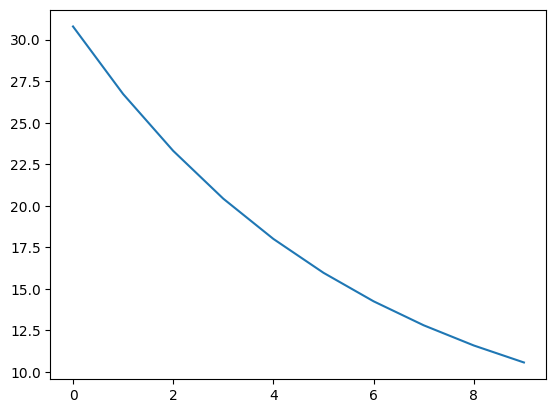

[0.03764683 0.45393872]
代价最小为： 10.559618437644504


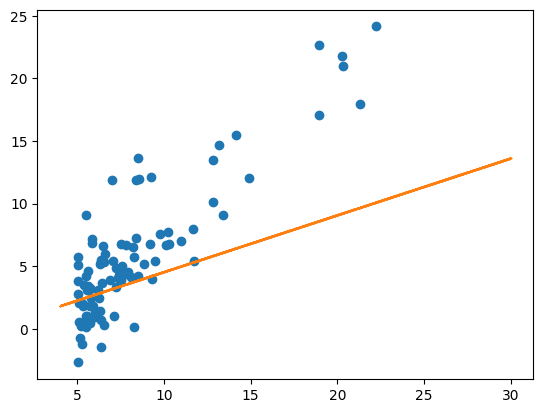

In [8]:
main(10,0.001)

观察图像可以知道，虽然cost在下降，但整体显然还没有到达最小值附近，还需要继续下降才有可能到达，此时cout最小值为10.559618437644504

#### 迭代次数100，下降速度0.001

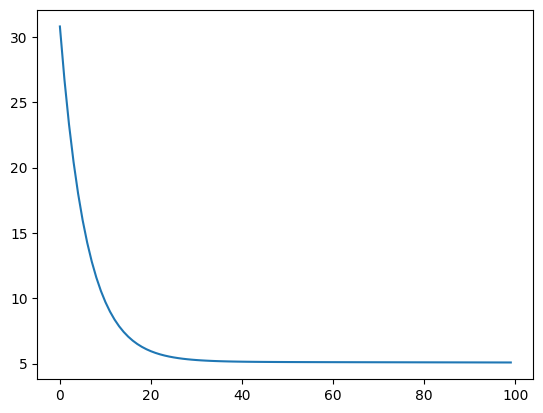

[0.00171092 0.79141847]
代价最小为： 5.079117963358392


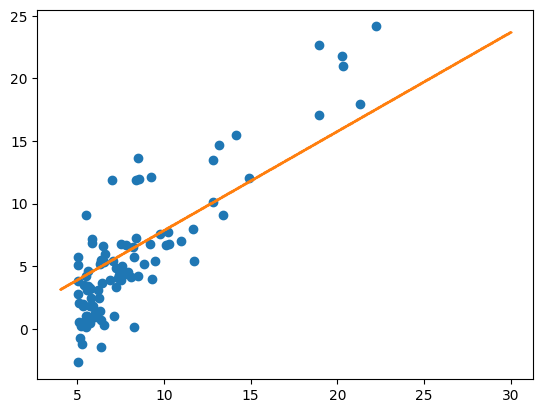

In [9]:
main(100,0.001)

观察图像可以知道，当加大了迭代次数后，下降效果明显比10代强了好多，但是下降到20多代时，发现cost的下降熟读骤然减小，几乎为一条直线
此时的代价最小为5.079117963358392

#### 迭代次数1000，下降速度0.001

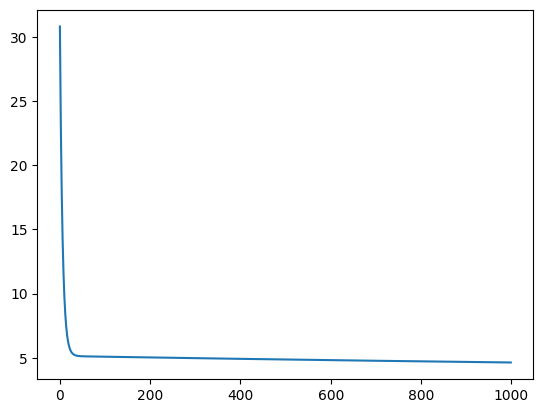

[-0.63036147  0.85486704]
代价最小为： 4.629629301471577


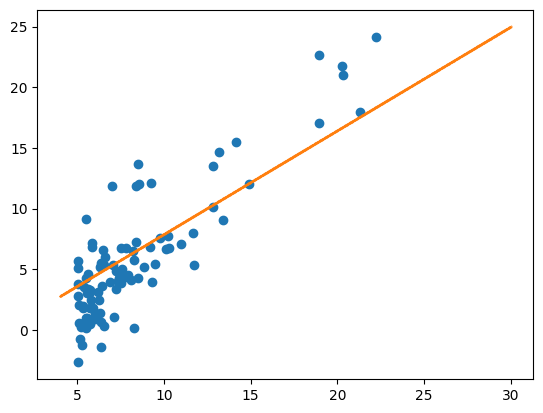

In [10]:
main(1000,0.001)

观察图像可以看到，当迭代次数继续增加到1000时，虽然有效果cost依然下降了，但是相比于100次的时候，cost却只减少了0.4左右，代价最小为4.629629301471577  
说明随着迭代次数的不断增加，代价下降的越来越缓慢，后期的收益微乎其微，但整体拟合效果还是差了一点

#### 迭代次数100，下降速度0.01

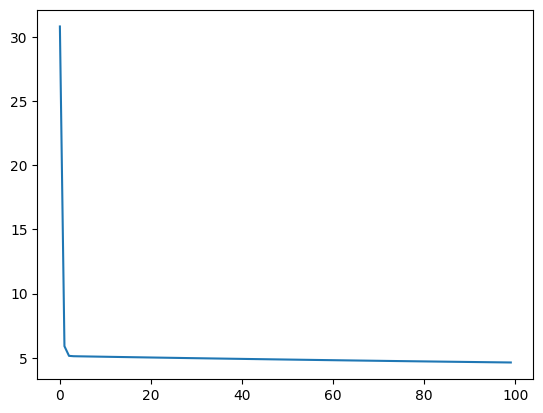

[-0.6308877   0.85491974]
代价最小为： 4.633097746092306


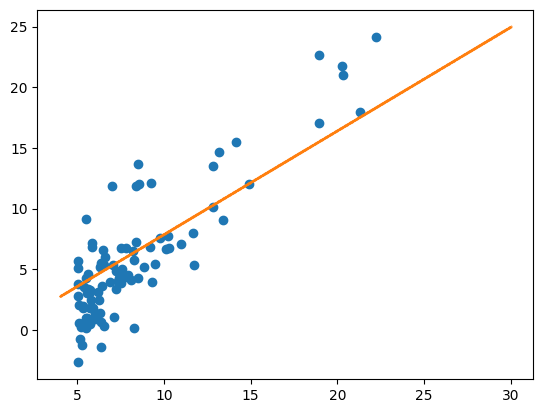

In [11]:
main(100,0.01)

观察图像可以看到，当迭代次数减小到100，但是下降速度怎加到10倍，整体的代价也为4.6左右与1000代的几乎一样，说明当几乎不能靠怎加迭代次数  
来继续减小代价的时候，可以增加下降速度来加速下降
#### 迭代次数100，下降速度0.1

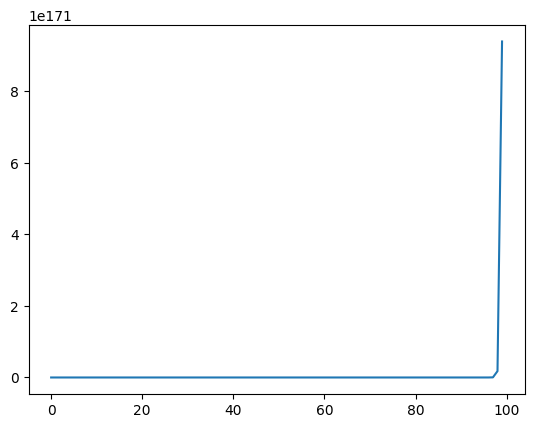

[-1.09110472e+85 -1.08938307e+86]
代价最小为： 30.79495785534583


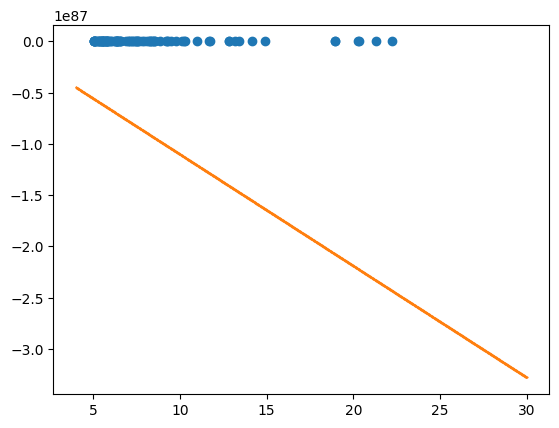

In [12]:
main(100,0.1)

观察图像我们可以看到，cost不仅没有下降反而上升了，这就说明我们的学习速度不能无限制的增加，学习速度过大，就会越过最低点导致cost不收敛
### 找到规律后不断逼近最大学习速度迭代1000，下降速度0.02

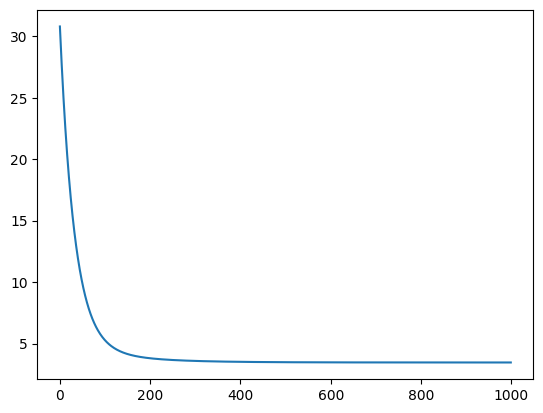

[-4.15577958  1.20796589]
代价最小为： 3.459867575064487


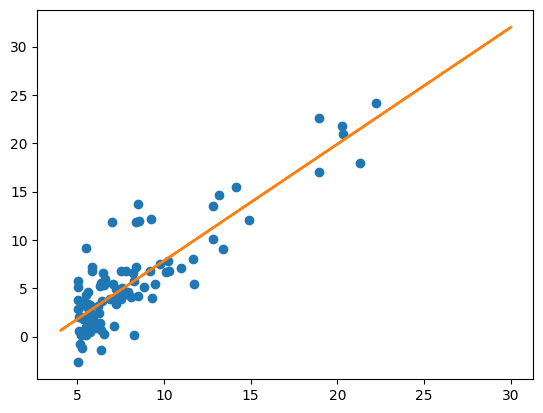

In [13]:
main(1000,0.024)

在最后不断地逼近即将发散的点，找到合适的下降速度0.024，然后迭代1000代，最小代价为3.459867575064487
基本拟合散点图